In [13]:
# ================================
# STEP 1: Import Required Libraries
# ================================

# ----- Basic -----
import pandas as pd
import numpy as np

# ----- Visualization -----
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Machine Learning -----
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ----- Panel Regression -----
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# ----- Display settings -----
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("✅ Step 1 completed – Libraries imported successfully!")


✅ Step 1 completed – Libraries imported successfully!


In [14]:
# ================================
# STEP 2: Load Dataset
# ================================

data = pd.read_csv("../data/cleaned/final_merged_dataset.csv")

print("✅ Step 2 completed – Dataset loaded successfully!")
print("Shape of dataset:", data.shape)
display(data.head())


✅ Step 2 completed – Dataset loaded successfully!
Shape of dataset: (6930, 18)


,State,Crime_Type,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
0,Andaman & Nicobar Islands,Burglary,2001,2818,5.88,38.54,21691.80,4.40,10,915,61.94,24.00,22.0,0.535,6,37.0,59,2.30
1,Andaman & Nicobar Islands,Burglary,2002,2402,4.80,37.61,22162.42,7.63,10,904,62.09,26.98,21.4,0.528,7,41.1,55,2.05
2,Andaman & Nicobar Islands,Burglary,2003,4155,5.75,36.41,22868.34,2.43,17,912,62.32,27.96,24.8,0.543,5,42.2,64,2.18
3,Andaman & Nicobar Islands,Burglary,2004,1299,5.98,37.11,23056.59,5.83,14,910,62.38,27.94,23.2,0.548,7,41.3,57,2.06
4,Andaman & Nicobar Islands,Burglary,2005,1873,5.70,35.07,23480.14,5.63,17,913,62.52,23.92,24.6,0.553,5,36.4,61,2.59


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           6930 non-null   object 
 1   Crime_Type                      6930 non-null   object 
 2   Year                            6930 non-null   int64  
 3   Cases                           6930 non-null   int64  
 4   unemployment_rate               6930 non-null   float64
 5   poverty_rate                    6930 non-null   float64
 6   per_capita_income               6930 non-null   float64
 7   inflation_rate                  6930 non-null   float64
 8   population_density              6930 non-null   int64  
 9   gender_ratio                    6930 non-null   int64  
 10  literacy_rate                   6930 non-null   float64
 11  youth_population_percent        6930 non-null   float64
 12  urbanization_rate 

,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
count,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000
mean,2011.500000,2602.713420,5.897364,28.075610,48335.532675,4.983247,103.270130,901.533766,69.921675,25.178312,37.020779,0.652336,10.174026,36.987662,103.738961,2.669688
std,6.344747,1384.327412,0.994195,4.293755,39523.696963,1.419813,96.061581,27.151033,7.350325,2.948810,8.139293,0.054179,4.173605,6.252405,20.232866,0.560403
min,2001.000000,21.000000,2.800000,18.600000,5712.000000,2.000000,10.000000,850.000000,54.960000,16.580000,17.000000,0.484000,5.000000,22.100000,54.000000,1.170000
25%,2006.000000,1544.250000,5.230000,24.980000,23480.140000,3.990000,11.000000,879.000000,64.190000,22.920000,30.400000,0.616000,7.000000,32.200000,89.000000,2.280000
50%,2011.500000,2580.000000,5.955000,27.500000,38289.500000,5.035000,87.000000,904.000000,69.240000,25.650000,36.700000,0.654000,9.000000,37.600000,104.000000,2.650000
75%,2017.000000,3643.750000,6.590000,31.000000,66358.000000,5.950000,165.000000,923.000000,75.070000,27.580000,43.800000,0.691000,13.000000,41.700000,117.000000,3.070000
max,2022.000000,9514.000000,8.550000,39.230000,199643.430000,8.870000,408.000000,952.000000,84.520000,31.000000,54.400000,0.810000,19.000000,51.100000,166.000000,4.070000


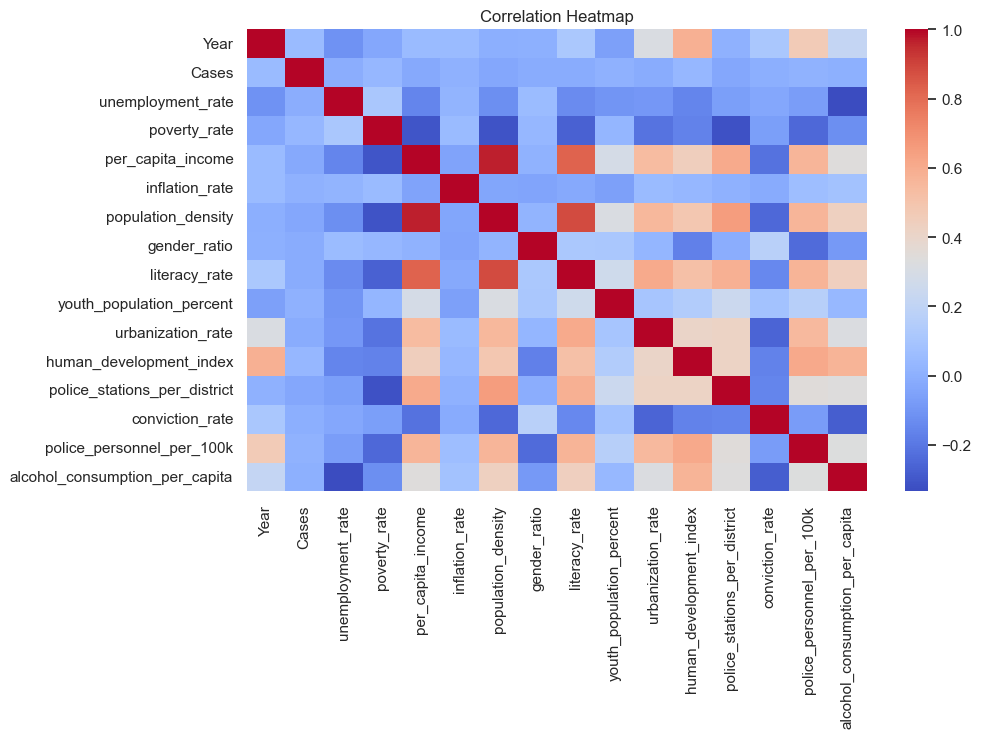

✅ Step 3 completed – Dataset understood!


In [15]:
# ================================
# STEP 3: Basic EDA
# ================================

print("🔹 Dataset Info:")
data.info()

print("\n🔹 Missing values:")
print(data.isnull().sum())

print("\n🔹 Duplicate rows:", data.duplicated().sum())

print("\n🔹 Summary Statistics:")
display(data.describe())

# --- Correlation heatmap for numeric features ---
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

print("✅ Step 3 completed – Dataset understood!")


In [16]:
# ================================
# STEP 4: Data Cleaning
# ================================

# Already cleaned dataset (final_merged_dataset.csv)
# Just verify again
print("Missing values:", data.isnull().sum().sum())
print("Duplicate rows:", data.duplicated().sum())

print("✅ Step 4 completed – Data is clean!")


Missing values: 0
Duplicate rows: 0
✅ Step 4 completed – Data is clean!


In [17]:
# ================================
# STEP 5: Feature Selection
# ================================

# Target variable (Dependent)
y = data["Cases"]

# Independent variables (features)
X = data[[
    "State", "Crime_Type", "Year",
    "unemployment_rate", "poverty_rate", "per_capita_income",
    "inflation_rate", "population_density", "gender_ratio",
    "literacy_rate", "youth_population_percent", "urbanization_rate",
    "human_development_index", "police_stations_per_district",
    "conviction_rate", "police_personnel_per_100k",
    "alcohol_consumption_per_capita"
]]

print("✅ Step 5 completed – Features & Target selected!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Step 5 completed – Features & Target selected!
X shape: (6930, 17)
y shape: (6930,)


In [18]:
# ================================
# STEP 6: Encode & Scale
# ================================

cat_cols = ["State", "Crime_Type"]
num_cols = [col for col in X.columns if col not in cat_cols]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

X_transformed = preprocessor.fit_transform(X)

print("✅ Step 6 completed – Encoding & Scaling done!")
print("Original shape:", X.shape)
print("Transformed shape:", X_transformed.shape)


✅ Step 6 completed – Encoding & Scaling done!
Original shape: (6930, 17)
Transformed shape: (6930, 59)


In [19]:
# ================================
# STEP 7: Train–Validation–Test Split (Year-based)
# ================================

# Create masks
train_mask = (data["Year"] >= 2001) & (data["Year"] <= 2017)
val_mask   = (data["Year"] >= 2018) & (data["Year"] <= 2020)
test_mask  = (data["Year"] >= 2021) & (data["Year"] <= 2022)

# Convert transformed array to DataFrame for masking
X_df = pd.DataFrame(X_transformed, index=data.index)

# Apply masks
X_train, y_train = X_df[train_mask], y[train_mask]
X_val, y_val     = X_df[val_mask],   y[val_mask]
X_test, y_test   = X_df[test_mask],  y[test_mask]

print("✅ Step 7 completed – Year-based split done!")
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


✅ Step 7 completed – Year-based split done!
Train: (5355, 59), Val: (945, 59), Test: (630, 59)


🔍 Correlation of features with Crime Cases:

Cases                             1.000000
Year                              0.051030
human_development_index           0.034542
poverty_rate                      0.030613
police_personnel_per_100k         0.010295
inflation_rate                    0.007649
youth_population_percent          0.006264
alcohol_consumption_per_capita   -0.000707
conviction_rate                  -0.003692
unemployment_rate                -0.008772
gender_ratio                     -0.012039
literacy_rate                    -0.015746
urbanization_rate                -0.016143
per_capita_income                -0.026769
population_density               -0.034717
police_stations_per_district     -0.036045
Name: Cases, dtype: float64


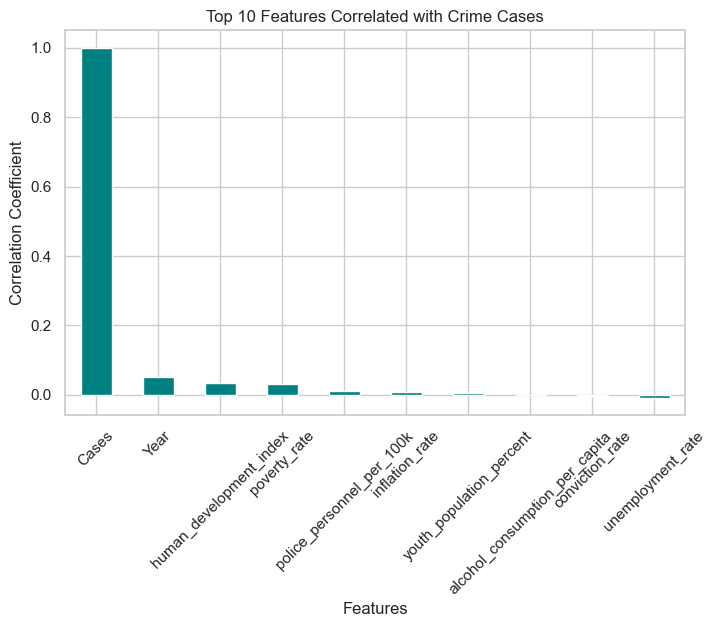

In [20]:
# ================================
# STEP 7A: Correlation Analysis (Feature Impact)
# ================================

# Compute correlation of all numeric columns with 'Cases'
corr_with_cases = data.corr(numeric_only=True)["Cases"].sort_values(ascending=False)

print("🔍 Correlation of features with Crime Cases:\n")
print(corr_with_cases)

# Plot top 10 correlated features
plt.figure(figsize=(8,5))
corr_with_cases.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Features Correlated with Crime Cases")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()


✅ Simple Linear Regression (Year → Cases) Evaluation Results:
R² Score: -0.0151
Mean Absolute Error (MAE): 1251.49
Root Mean Squared Error (RMSE): 1601.98


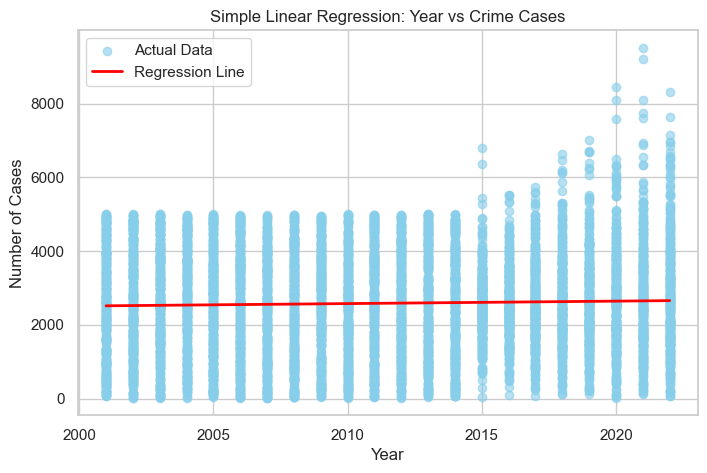

💾 Model saved successfully as 'simple_linear_regression_year.pkl'


In [21]:
# ================================
# STEP 8: Simple Linear Regression (Year → Cases)
# ================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pickle

# 1️⃣ Independent and Dependent Variables
X_year = data[["Year"]]     # Predictor → Year
y_cases = data["Cases"]      # Target → Cases

# 2️⃣ Split Data Year-wise
train_mask = (data["Year"] >= 2001) & (data["Year"] <= 2020)
test_mask  = (data["Year"] >= 2021) & (data["Year"] <= 2022)

X_train, y_train = X_year[train_mask], y_cases[train_mask]
X_test, y_test   = X_year[test_mask],  y_cases[test_mask]

# 3️⃣ Initialize and Train the Model
simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

# 4️⃣ Predict on Test Set
y_pred = simple_lr.predict(X_test)

# 5️⃣ Evaluate the Model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Simple Linear Regression (Year → Cases) Evaluation Results:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 6️⃣ Plot: Year vs Cases (Regression Line)
plt.figure(figsize=(8,5))
plt.scatter(X_year, y_cases, color="skyblue", label="Actual Data", alpha=0.6)
plt.plot(X_year, simple_lr.predict(X_year), color="red", label="Regression Line", linewidth=2)
plt.title("Simple Linear Regression: Year vs Crime Cases")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

# 7️⃣ Save the Model
with open("../model/simple_linear_regression_year.pkl", "wb") as f:
    pickle.dump(simple_lr, f)

print("💾 Model saved successfully as 'simple_linear_regression_year.pkl'")


✅ Simple Linear Regression (Year → Cases) Evaluation Results:

📊 Train Set Performance:
R² Score: 0.0008
MAE: 1136.85
RMSE: 1358.97

📊 Test Set Performance:
R² Score: -0.0151
MAE: 1251.49
RMSE: 1601.98


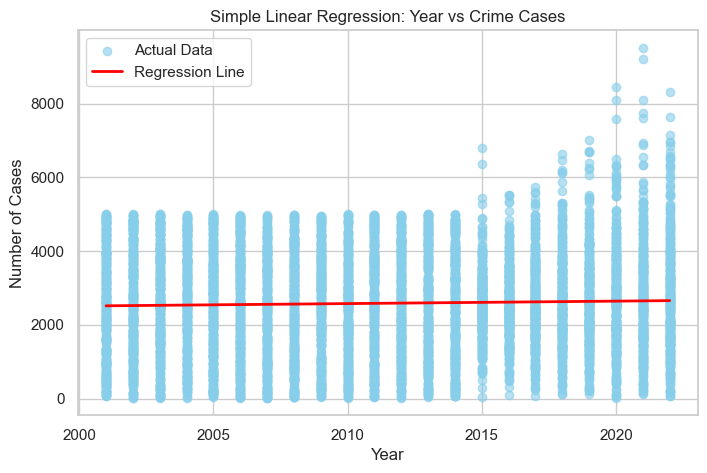

💾 Model saved successfully as 'simple_linear_regression_year.pkl'


In [27]:
# ================================
# STEP 8: Simple Linear Regression (Year → Cases)
# ================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 1️⃣ Independent and Dependent Variables
X_year = data[["Year"]]     # Predictor → Year
y_cases = data["Cases"]      # Target → Cases

# 2️⃣ Split Data Year-wise
train_mask = (data["Year"] >= 2001) & (data["Year"] <= 2020)
test_mask  = (data["Year"] >= 2021) & (data["Year"] <= 2022)

X_train, y_train = X_year[train_mask], y_cases[train_mask]
X_test, y_test   = X_year[test_mask],  y_cases[test_mask]

# 3️⃣ Initialize and Train the Model
simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

# 4️⃣ Predict on Train and Test Sets
y_train_pred = simple_lr.predict(X_train)
y_test_pred  = simple_lr.predict(X_test)

# 5️⃣ Evaluate the Model
def evaluate(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n📊 {name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

print("✅ Simple Linear Regression (Year → Cases) Evaluation Results:")
evaluate(y_train, y_train_pred, "Train")
evaluate(y_test,  y_test_pred,  "Test")

# 6️⃣ Plot: Year vs Cases (Regression Line)
plt.figure(figsize=(8,5))
plt.scatter(X_year, y_cases, color="skyblue", label="Actual Data", alpha=0.6)
plt.plot(X_year, simple_lr.predict(X_year), color="red", label="Regression Line", linewidth=2)
plt.title("Simple Linear Regression: Year vs Crime Cases")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

# 7️⃣ Save the Model
with open("../model/simple_linear_regression_year.pkl", "wb") as f:
    pickle.dump(simple_lr, f)

print("💾 Model saved successfully as 'simple_linear_regression_year.pkl'")


✅ Year-based split verified!
Train: (5355, 59), Val: (945, 59), Test: (630, 59)

✅ Multiple Linear Regression Evaluation Results:
---- Validation Set ----
R² Score: 0.0279
MAE: 1044.44
RMSE: 1333.81
---- Test Set ----
R² Score: -0.0110
MAE: 1240.73
RMSE: 1598.71


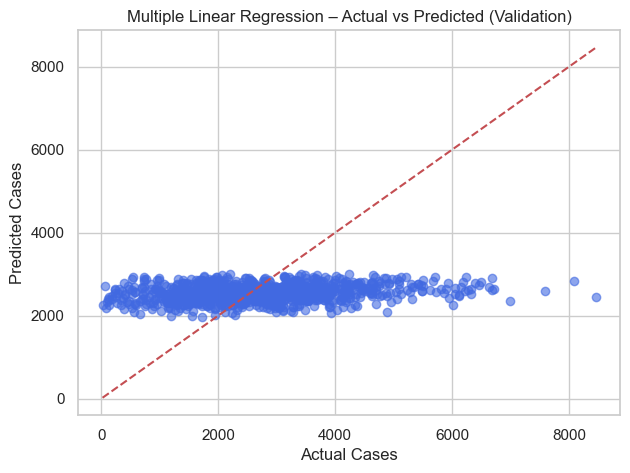

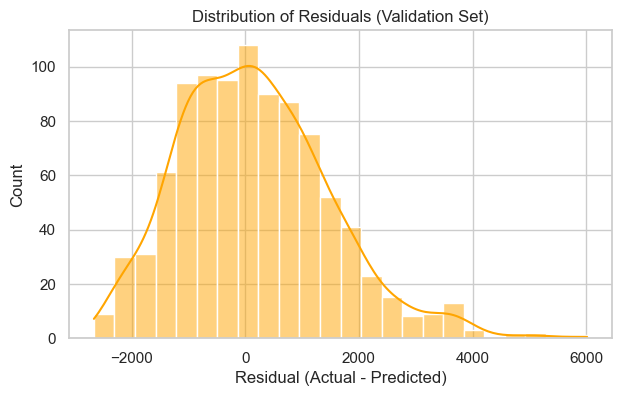

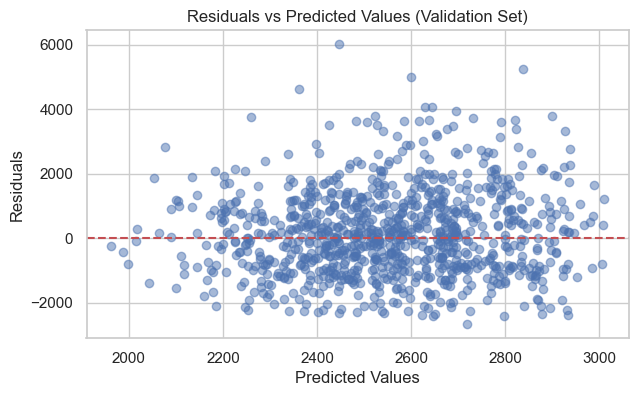

💾 Model saved successfully as 'multiple_linear_regression.pkl'

🔍 Checking loaded model predictions on sample data:
[2663.7642721  2687.1194529  2584.32194962 2606.89872588 2630.25390668]


In [22]:
# ============================================
# STEP 9 : MULTIPLE LINEAR REGRESSION MODEL
# ============================================

# ✅ Ensure you have correct train/val/test sets
# (In case simple regression redefined any variables)
X_df = pd.DataFrame(X_transformed, index=data.index)

train_mask = (data["Year"] >= 2001) & (data["Year"] <= 2017)
val_mask   = (data["Year"] >= 2018) & (data["Year"] <= 2020)
test_mask  = (data["Year"] >= 2021) & (data["Year"] <= 2022)

X_train, y_train = X_df[train_mask], y[train_mask]
X_val, y_val     = X_df[val_mask],   y[val_mask]
X_test, y_test   = X_df[test_mask],  y[test_mask]

print("✅ Year-based split verified!")
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# ----- Import libraries -----
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 1️⃣ Initialize & Train Model
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# 2️⃣ Predict on Validation & Test Data
y_val_pred = multi_lr.predict(X_val)
y_test_pred = multi_lr.predict(X_test)

# 3️⃣ Evaluate Model Performance
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n✅ Multiple Linear Regression Evaluation Results:")
print("---- Validation Set ----")
print(f"R² Score: {r2_val:.4f}")
print(f"MAE: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print("---- Test Set ----")
print(f"R² Score: {r2_test:.4f}")
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")

# 4️⃣ Plot: Actual vs Predicted (Validation)
plt.figure(figsize=(7,5))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Multiple Linear Regression – Actual vs Predicted (Validation)")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], "r--")
plt.show()

# 5️⃣ Residual Analysis
residuals = y_val - y_val_pred
plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True, color="orange")
plt.title("Distribution of Residuals (Validation Set)")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

plt.figure(figsize=(7,4))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values (Validation Set)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 6️⃣ Save the Model
with open("../model/multiple_linear_regression.pkl", "wb") as f:
    pickle.dump(multi_lr, f)

print("💾 Model saved successfully as 'multiple_linear_regression.pkl'")

# 7️⃣ Verify Loaded Model
with open("../model/multiple_linear_regression.pkl", "rb") as f:
    loaded_multi_lr = pickle.load(f)

sample_pred = loaded_multi_lr.predict(X_val[:5])
print("\n🔍 Checking loaded model predictions on sample data:")
print(sample_pred)


✅ Year-based split verified!
Train: (6300, 59), Test: (630, 59)

✅ Multiple Linear Regression Evaluation Results:
R² Score (Test Set): -0.0063
MAE (Test Set): 1183.70
RMSE (Test Set): 1433.29


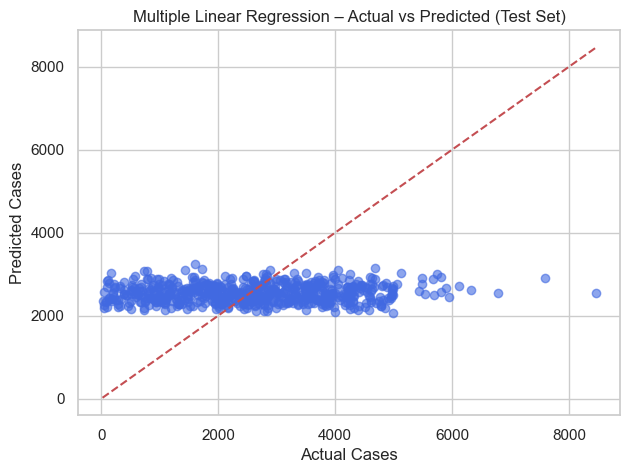

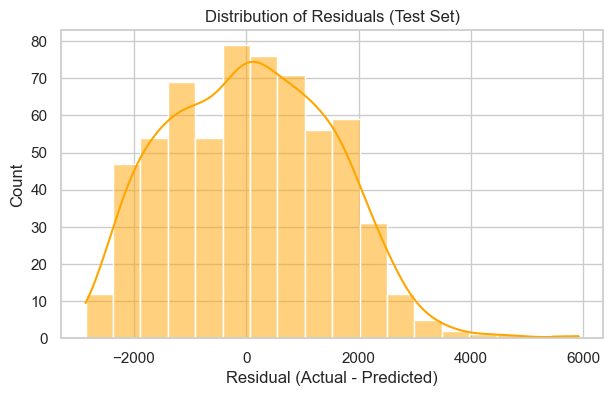

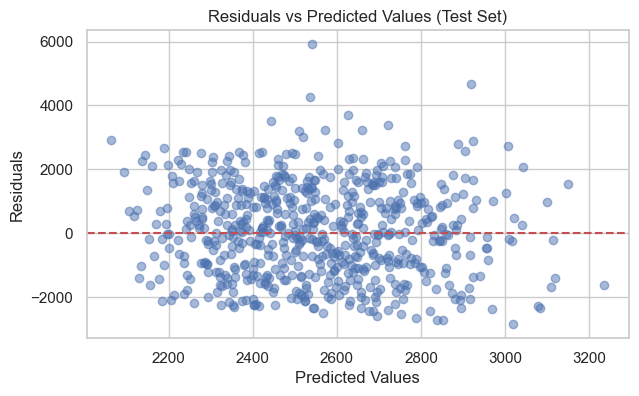

💾 Model saved successfully as 'multiple_linear_regression.pkl'

🔍 Checking loaded model predictions on sample data:
[2569.09900674 2548.66235679 2662.98614959 2642.54949965 2520.58757817]


In [26]:
# ============================================
# STEP 9 : MULTIPLE LINEAR REGRESSION MODEL (Train: 2001–2020, Test: 2021–2022)
# ============================================

# ✅ Ensure X_df and data have same aligned index
X_df = pd.DataFrame(X_transformed, index=data.index).reset_index(drop=True)
data_reset = data.reset_index(drop=True)
y_reset = y.reset_index(drop=True)

# -------------------- Split by Year --------------------
train_mask = (data_reset["Year"] >= 2001) & (data_reset["Year"] <= 2020)
test_mask  = (data_reset["Year"] >= 2021) & (data_reset["Year"] <= 2022)

X_train, y_train = X_df[train_mask], y_reset[train_mask]
X_test, y_test   = X_df[test_mask],  y_reset[test_mask]

print("✅ Year-based split verified!")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# -------------------- Import libraries --------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 1️⃣ Initialize & Train Model
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# 2️⃣ Predict on Test Data
y_test_pred = multi_lr.predict(X_test)

# 3️⃣ Evaluate Model Performance
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n✅ Multiple Linear Regression Evaluation Results:")
print(f"R² Score (Test Set): {r2_test:.4f}")
print(f"MAE (Test Set): {mae_test:.2f}")
print(f"RMSE (Test Set): {rmse_test:.2f}")

# 4️⃣ Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Multiple Linear Regression – Actual vs Predicted (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

# 5️⃣ Residual Analysis
residuals = y_test - y_test_pred

plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True, color="orange")
plt.title("Distribution of Residuals (Test Set)")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

plt.figure(figsize=(7,4))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values (Test Set)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 6️⃣ Save the Model
with open("../model/multiple_linear_regression.pkl", "wb") as f:
    pickle.dump(multi_lr, f)

print("💾 Model saved successfully as 'multiple_linear_regression.pkl'")

# 7️⃣ Verify Loaded Model
with open("../model/multiple_linear_regression.pkl", "rb") as f:
    loaded_multi_lr = pickle.load(f)

sample_pred = loaded_multi_lr.predict(X_test[:5])
print("\n🔍 Checking loaded model predictions on sample data:")
print(sample_pred)


✅ Year-based split verified!
Train: (6300, 59), Test: (630, 59)

✅ Multiple Linear Regression Evaluation Results:

📊 Train Set Performance:
R² Score: 0.0250
MAE: 1132.40
RMSE: 1362.34

📊 Test Set Performance:
R² Score: -0.0063
MAE: 1183.70
RMSE: 1433.29


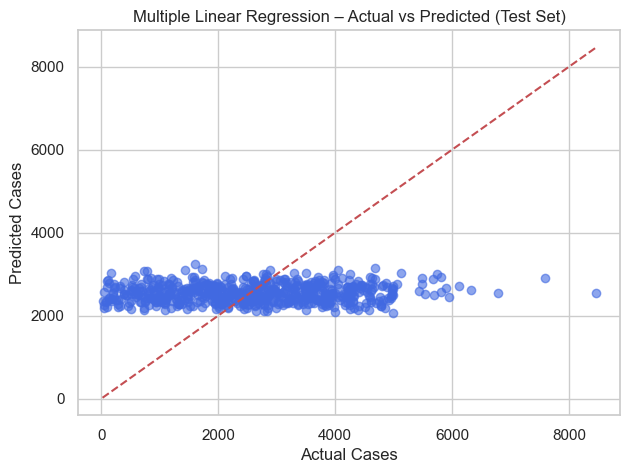

💾 Model saved successfully as 'multiple_linear_regression.pkl'


In [28]:
# ============================================
# STEP 9 : MULTIPLE LINEAR REGRESSION MODEL (Train: 2001–2020, Test: 2021–2022)
# ============================================

# ✅ Ensure aligned indexes
X_df = pd.DataFrame(X_transformed, index=data.index).reset_index(drop=True)
data_reset = data.reset_index(drop=True)
y_reset = y.reset_index(drop=True)

# -------------------- Split by Year --------------------
train_mask = (data_reset["Year"] >= 2001) & (data_reset["Year"] <= 2020)
test_mask  = (data_reset["Year"] >= 2021) & (data_reset["Year"] <= 2022)

X_train, y_train = X_df[train_mask], y_reset[train_mask]
X_test, y_test   = X_df[test_mask],  y_reset[test_mask]

print("✅ Year-based split verified!")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# -------------------- Train the Model --------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# -------------------- Predict --------------------
y_train_pred = multi_lr.predict(X_train)
y_test_pred  = multi_lr.predict(X_test)

# -------------------- Evaluate --------------------
def evaluate(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n📊 {name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

print("\n✅ Multiple Linear Regression Evaluation Results:")
evaluate(y_train, y_train_pred, "Train")
evaluate(y_test,  y_test_pred,  "Test")

# -------------------- Plot Actual vs Predicted --------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Multiple Linear Regression – Actual vs Predicted (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

# -------------------- Save Model --------------------
with open("../model/multiple_linear_regression.pkl", "wb") as f:
    pickle.dump(multi_lr, f)

print("💾 Model saved successfully as 'multiple_linear_regression.pkl'")


✅ Train shape: (6300, 15), Test shape: (630, 15)
✅ Model trained successfully!

📊 Train (2001–2020) Performance:
R² Score: -0.6493
MAE: 1434.09
RMSE: 1745.95

📊 Test (2021–2022) Performance:
R² Score: -0.4378
MAE: 1525.79
RMSE: 1906.55


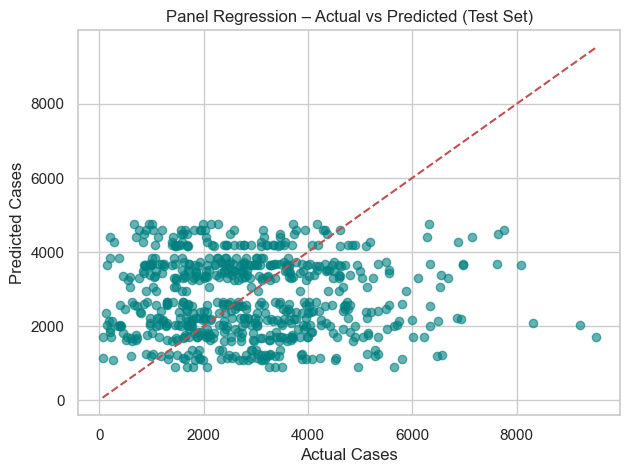

In [33]:
# ============================================
# STEP 10 : PANEL REGRESSION (State & Year Fixed Effects)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1️⃣ Prepare dataset
panel_df = data.copy()
panel_df = panel_df.drop(columns=['Crime_Type'], errors='ignore')

# Set MultiIndex (State, Year)
panel_df = panel_df.set_index(['State', 'Year']).sort_index()

# Dependent & Independent
y = panel_df['Cases']
X = panel_df.drop(columns=['Cases'])

# 2️⃣ Scale numeric columns
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Add constant
X_scaled = sm.add_constant(X_scaled)

# 3️⃣ Split train/test by Year
train = X_scaled.loc[pd.IndexSlice[:, 2001:2020], :]
test  = X_scaled.loc[pd.IndexSlice[:, 2021:2022], :]

y_train = y.loc[pd.IndexSlice[:, 2001:2020]]
y_test  = y.loc[pd.IndexSlice[:, 2021:2022]]

print(f"✅ Train shape: {train.shape}, Test shape: {test.shape}")

# 4️⃣ Fit Model (State + Time Fixed Effects)
panel_model = PanelOLS(y_train, train, entity_effects=True, time_effects=True)
results = panel_model.fit(cov_type="unadjusted")  # suppress huge summary
print("✅ Model trained successfully!")

# 5️⃣ Predict on Train & Test
y_train_pred = results.predict(train)
y_test_pred  = results.predict(test)

# Align indexes for safety
y_train_pred.index = y_train.index
y_test_pred.index = y_test.index

# 6️⃣ Evaluation Function
def evaluate(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n📊 {name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return r2, mae, rmse

# 7️⃣ Evaluate both sets
evaluate(y_train, y_train_pred, "Train (2001–2020)")
evaluate(y_test, y_test_pred, "Test (2021–2022)")

# 8️⃣ Visualization – Actual vs Predicted (Test)
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Panel Regression – Actual vs Predicted (Test Set)")
plt.show()




✅ Step 10.1: Data prepared for Panel Regression!


const  unemployment_rate  poverty_rate  \
State                     Year                                           
Andaman & Nicobar Islands 2001    1.0               5.88         38.54   
                          2002    1.0               4.80         37.61   
                          2003    1.0               5.75         36.41   
                          2004    1.0               5.98         37.11   
                          2005    1.0               5.70         35.07   

                                per_capita_income  inflation_rate  \
State                     Year                                      
Andaman & Nicobar Islands 2001           21691.80            4.40   
                          2002           22162.42            7.63   
                          2003           22868.34            2.43   
                          2004           23056.59            5.83   
                          2005           23480.14            5.63   

                                population_density  gender_ratio  \
State                     Year                                     
Andaman & Nicobar Islands 2001                  10           915   
                          2002                  10           904   
                          2003                  17           912   
                          2004                  14           910   
                          2005                  17           913   

                                literacy_rate  youth_population_percent  \
State                     Year                                            
Andaman & Nicobar Islands 2001          61.94                     24.00   
                          2002          62.09                     26.98   
                          2003          62.32                     27.96   
                          2004          62.38                     27.94   
                          2005          62.52                     23.92   

                                urbanization_rate  human_development_index  \
State                     Year                                               
Andaman & Nicobar Islands 2001               22.0                    0.535   
                          2002               21.4                    0.528   
                          2003               24.8                    0.543   
                          2004               23.2                    0.548   
                          2005               24.6                    0.553   

                                police_stations_per_district  conviction_rate  \
State                     Year                                                  
Andaman & Nicobar Islands 2001                             6             37.0   
                          2002                             7             41.1   
                          2003                             5             42.2   
                          2004                             7             41.3   
                          2005                             5             36.4   

                                police_personnel_per_100k  \
State                     Year                              
Andaman & Nicobar Islands 2001                         59   
                          2002                         55   
                          2003                         64   
                          2004                         57   
                          2005                         61   

                                alcohol_consumption_per_capita  
State                     Year                                  
Andaman & Nicobar Islands 2001                            2.30  
                          2002                            2.05  
                          2003                            2.18  
                          2004                            2.06  
                          2005                            2.59


✅ Step 10.2: Panel Regression Model Trained Successfully!

📊 Panel Regression Evaluation Metrics:
R² Score (Overall): -0.5211
Mean Absolute Error (MAE): 1401.38
Root Mean Squared Error (RMSE): 1707.20


C:\Users\janvi\AppData\Local\Temp\ipykernel_18820\3095760925.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeff_df.values, y=coeff_df.index, palette="coolwarm")


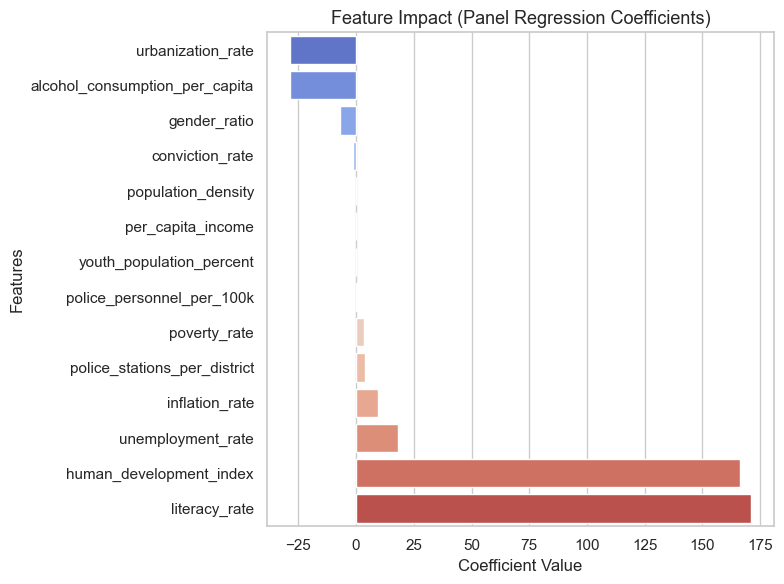

💾 Model saved successfully as 'panel_regression.pkl'


In [23]:
# ============================================
# STEP 10 : PANEL REGRESSION MODEL (Fixed Effects)
# ============================================

import pickle
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Prepare Data for Panel Regression
# -------------------------------------
# Convert dataset into panel structure using MultiIndex (State, Year)
panel_data = data.set_index(["State", "Year"])

# Select features (exclude Crime_Type — fixed effects already handle State)
X_panel = panel_data[[
    "unemployment_rate", "poverty_rate", "per_capita_income",
    "inflation_rate", "population_density", "gender_ratio",
    "literacy_rate", "youth_population_percent", "urbanization_rate",
    "human_development_index", "police_stations_per_district",
    "conviction_rate", "police_personnel_per_100k",
    "alcohol_consumption_per_capita"
]]

y_panel = panel_data["Cases"]

# Add constant (intercept)
X_panel = sm.add_constant(X_panel)

print("✅ Step 10.1: Data prepared for Panel Regression!")
display(X_panel.head())

# 2️⃣ Train the Panel Regression Model
# -------------------------------------
# entity_effects=True adds fixed effects per State
panel_model = PanelOLS(y_panel, X_panel, entity_effects=True)
panel_results = panel_model.fit()

print("\n✅ Step 10.2: Panel Regression Model Trained Successfully!")

# 3️⃣ Evaluate Model Performance
# -------------------------------------
# Predict on same data (for now we’re fitting one full model)
y_pred_panel = panel_results.predict().droplevel(0)  # Flatten index

# Compute metrics
r2_panel = r2_score(y_panel, y_pred_panel)
mae_panel = mean_absolute_error(y_panel, y_pred_panel)
rmse_panel = np.sqrt(mean_squared_error(y_panel, y_pred_panel))

print("\n📊 Panel Regression Evaluation Metrics:")
print(f"R² Score (Overall): {r2_panel:.4f}")
print(f"Mean Absolute Error (MAE): {mae_panel:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_panel:.2f}")

# 4️⃣ Plot: Feature Coefficients (Impact)
# -------------------------------------
coeff_df = panel_results.params.drop("const", errors="ignore").sort_values(ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x=coeff_df.values, y=coeff_df.index, palette="coolwarm")
plt.title("Feature Impact (Panel Regression Coefficients)", fontsize=13)
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 5️⃣ Save the Model
# -------------------------------------
with open("../model/panel_regression.pkl", "wb") as f:
    pickle.dump(panel_model, f)

print("💾 Model saved successfully as 'panel_regression.pkl'")




✅ Dataset loaded successfully!
✅ Data prepared successfully!

✅ Model trained successfully!

📊 Evaluation Metrics:
R² Score: -0.5211
MAE: 1401.38
RMSE: 1707.20


C:\Users\janvi\AppData\Local\Temp\ipykernel_18820\286518418.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.values, y=coef_df.index, palette="coolwarm")


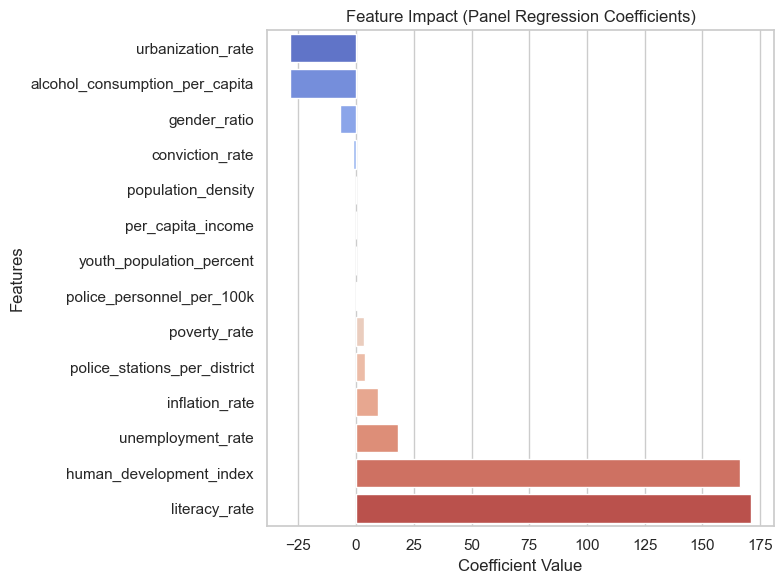

💾 Model saved successfully as 'panel_regression_clean.pkl'


In [24]:
# ============================================
# STEP 10 : SIMPLE & ERROR-FREE PANEL REGRESSION
# ============================================

# ----- Import Libraries -----
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ----- 1️⃣ Load Dataset -----
df = pd.read_csv("../data/cleaned/final_merged_dataset.csv")
print("✅ Dataset loaded successfully!")

# ----- 2️⃣ Prepare Data -----
# Set MultiIndex (State, Year)
panel_data = df.set_index(["State", "Year"])

# Dependent and independent variables
y = panel_data["Cases"]
X = panel_data[[
    "unemployment_rate", "poverty_rate", "per_capita_income",
    "inflation_rate", "population_density", "gender_ratio",
    "literacy_rate", "youth_population_percent", "urbanization_rate",
    "human_development_index", "police_stations_per_district",
    "conviction_rate", "police_personnel_per_100k",
    "alcohol_consumption_per_capita"
]]

# Add constant
X = sm.add_constant(X)

# Sort index
X = X.sort_index()
y = y.sort_index()

print("✅ Data prepared successfully!")

# ----- 3️⃣ Fit PanelOLS (Fixed Effects for State) -----
try:
    panel_model = PanelOLS(y, X, entity_effects=True)
    results = panel_model.fit()
    print("\n✅ Model trained successfully!")
except Exception as e:
    print("❌ Error during model fitting:", e)

# ----- 4️⃣ Evaluate -----
try:
    y_pred = results.predict().droplevel(0)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print("\n📊 Evaluation Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
except Exception as e:
    print("❌ Error during evaluation:", e)

# ----- 5️⃣ Coefficient Plot -----
try:
    coef_df = results.params.drop("const", errors="ignore").sort_values(ascending=True)
    plt.figure(figsize=(8,6))
    sns.barplot(x=coef_df.values, y=coef_df.index, palette="coolwarm")
    plt.title("Feature Impact (Panel Regression Coefficients)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("❌ Error during plotting:", e)

# ----- 6️⃣ Save Model -----
try:
    with open("../model/panel_regression_clean.pkl", "wb") as f:
        pickle.dump(panel_model, f)
    print("💾 Model saved successfully as 'panel_regression_clean.pkl'")
except Exception as e:
    print("❌ Error during saving:", e)
